In [65]:
import pandas as pd
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [66]:
data =mnist.load_data()

In [67]:
data[1][:2]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [72]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [73]:
 train_images.shape

(60000, 28, 28)

In [74]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [75]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [76]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [77]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [78]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [79]:
 network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4356 - accuracy: 0.8728
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1131 - accuracy: 0.9670
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0680 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0478 - accuracy: 0.9865
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0356 - accuracy: 0.9897


In [80]:
 test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print("testing loss", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9783
test_acc: 0.9782999753952026
testing loss 0.07097332179546356


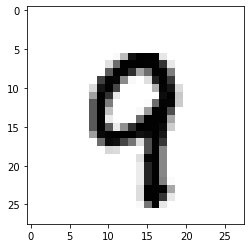

In [81]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = train_images[350]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

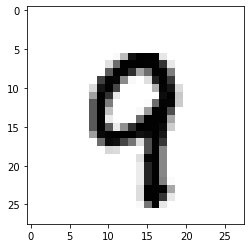

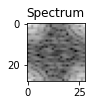

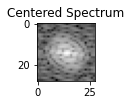

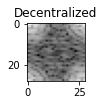

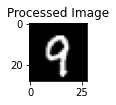

In [82]:

img_c1 = digit #cv2.imread(digit, 0)
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
#plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(151), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.show()
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum") 
plt.show()
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.show()
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()